In [2]:
import pandas as pd
import numpy as np
import datetime
import sys
import seaborn as sns
sys.path.append("C:\\Users\\Garimahdi.Supandi\\converting_excel")
import dataClean
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Extracting daily count for both devices
isense_1 = dataClean.dataReader("D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\HistoryMeter.csv")
isense_2 = dataClean.dataReader("D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\HistoryMeter (1).csv")
isense_201 = dataClean.dataReader("C:\\Users\\Garimahdi.Supandi\\Downloads\\HistoryMeter.csv")
isense_101 = dataClean.dataReader("C:\\Users\\Garimahdi.Supandi\\Downloads\\HistoryMeter (1).csv")

#isense_1.drop(columns=[
#    'black_toner',
#    'cyan_toner',
#    'magenta_toner',
#    'yellow_toner',
#    'black_drum',
#    'cyan_drum',
#    'magenta_drum',
#    'yellow_drum',
#    'waste_toner',
#    'sn_black_toner',
#    'sn_cyan_toner',
#    'sn_magenta_toner',
#    'sn_yellow_toner',
#    'sn_black_drum',
#    'sn_cyan_drum',
#    'sn_magenta_drum',
#    'sn_yellow_drum'
#    ], inplace=True)

#print(isense_1.info())

In [3]:
isense_101.drop(columns=[
    'black_toner',
    'cyan_toner',
    'magenta_toner',
    'yellow_toner',
    'black_drum',
    'cyan_drum',
    'magenta_drum',
    'yellow_drum',
    'waste_toner',
    'sn_black_toner',
    'sn_cyan_toner',
    'sn_magenta_toner',
    'sn_yellow_toner',
    'sn_black_drum',
    'sn_cyan_drum',
    'sn_magenta_drum',
    'sn_yellow_drum'
    ], inplace=True)

isense_201.drop(columns=[
    'black_toner',
    'cyan_toner',
    'magenta_toner',
    'yellow_toner',
    'black_drum',
    'cyan_drum',
    'magenta_drum',
    'yellow_drum',
    'waste_toner',
    'sn_black_toner',
    'sn_cyan_toner',
    'sn_magenta_toner',
    'sn_yellow_toner',
    'sn_black_drum',
    'sn_cyan_drum',
    'sn_magenta_drum',
    'sn_yellow_drum'
    ], inplace=True)

isense_101.to_excel("D:\\Astragraphia\\BO1\\KLK\\Lone Wolf Troubleshoot\\isense_1_patch.xlsx",index=False)
isense_201.to_excel("D:\\Astragraphia\\BO1\\KLK\\Lone Wolf Troubleshoot\\isense_2_patch.xlsx",index=False)

In [4]:
isense_2.drop(columns=[
    'black_toner',
    'cyan_toner',
    'magenta_toner',
    'yellow_toner',
    'black_drum',
    'cyan_drum',
    'magenta_drum',
    'yellow_drum',
    'waste_toner',
    'sn_black_toner',
    'sn_cyan_toner',
    'sn_magenta_toner',
    'sn_yellow_toner',
    'sn_black_drum',
    'sn_cyan_drum',
    'sn_magenta_drum',
    'sn_yellow_drum'
    ], inplace=True)

print(isense_2.head(2))

     log_id       model_name      ip_address  location  meter1  meter2  \
0  11792255  ApeosPort C2060  172.19.210.207       NaN   11041   30816   
1  11764462  ApeosPort C2060  172.19.210.207       NaN   11027   30740   

   meter3  meter4  black_printed  black_copied  color_copied  color_printed  \
0     103   41857          28945          1871           607          10434   
1     103   41767          28869          1871           607          10420   

  status_ready                 log_date customer_number color_status  proses  \
0          NaN  2023-09-29T23:59:03.657   CST6285145208        COLOR    True   
1          NaN    2023-09-27T23:58:15.3   CST6285145208        COLOR    True   

   version  model_code      sn  
0      NaN  JLTC101471  400229  
1      NaN  JLTC101471  400229  


In [ ]:
isense_1.to_excel("D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\isense_1.xlsx")
isense_2.to_excel("D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\isense_2.xlsx")
# End of changelog

In [5]:
print(list(range(4,12)))

[4, 5, 6, 7, 8, 9, 10, 11]


In [6]:
# Changelog 20/10/2023
isense_1 = pd.read_excel(r"D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\isense_1.xlsx")
isense_2 = pd.read_excel(r"D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\isense_2.xlsx")

print(isense_1.info())
columns = ['location', 'status_ready','version']
isense_1.drop(columns=columns, inplace=True)
isense_2.drop(columns=columns, inplace=True)

ic1 = list(isense_1.columns)
ic2 = list(isense_2.columns)

print(isense_1.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_id           201 non-null    int64  
 1   model_name       201 non-null    object 
 2   ip_address       201 non-null    object 
 3   location         0 non-null      float64
 4   meter1           195 non-null    float64
 5   meter2           195 non-null    float64
 6   meter3           195 non-null    float64
 7   meter4           195 non-null    float64
 8   black_printed    195 non-null    float64
 9   black_copied     195 non-null    float64
 10  color_copied     195 non-null    float64
 11  color_printed    195 non-null    float64
 12  status_ready     186 non-null    float64
 13  log_date         201 non-null    object 
 14  customer_number  201 non-null    object 
 15  color_status     201 non-null    object 
 16  proses           201 non-null    bool   
 17  version         

In [7]:
isense_1.info()
for i in range(3,7):
    print(ic1[i])
    isense_1[ic1[i]] = isense_1[ic1[i]].fillna(isense_1[ic1[i]].interpolate(method='linear', limit_direction = 'forward'))
    isense_2[ic2[i]] = isense_2[ic2[i]].fillna(isense_2[ic2[i]].interpolate(method='linear', limit_direction = 'forward'))
for i in range(3,7):
    isense_1[ic1[i]] = isense_1[ic1[i]].astype(int)
    isense_2[ic2[i]] = isense_2[ic2[i]].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_id           201 non-null    int64  
 1   model_name       201 non-null    object 
 2   ip_address       201 non-null    object 
 3   meter1           195 non-null    float64
 4   meter2           195 non-null    float64
 5   meter3           195 non-null    float64
 6   meter4           195 non-null    float64
 7   black_printed    195 non-null    float64
 8   black_copied     195 non-null    float64
 9   color_copied     195 non-null    float64
 10  color_printed    195 non-null    float64
 11  log_date         201 non-null    object 
 12  customer_number  201 non-null    object 
 13  color_status     201 non-null    object 
 14  proses           201 non-null    bool   
 15  model_code       201 non-null    object 
 16  sn               201 non-null    int64  
dtypes: bool(1), floa

NOTE:

Meter 1 = Colour
Meter 2 = Black

In [8]:
print(len(list(range(1,len(isense_1)))))
print(len(list(range(0,len(isense_1)))))
range1 = range(0,len(isense_1))
rangex1 = range(1,len(isense_1))
isense_1['daily_clr'] = abs(isense_1[ic1[3]].diff().shift(-1))
isense_1['daily_bw'] = abs(isense_1[ic1[4]].diff().shift(-1))
isense_2['daily_clr'] = abs(isense_2[ic2[3]].diff().shift(-1))
isense_2['daily_bw'] = abs(isense_2[ic2[4]].diff().shift(-1))
isense_1.head(6)
isense_2.head(6)

isense_1.to_excel("D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\is1_clean.xlsx", index=False)
isense_2.to_excel("D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\is2_clean.xlsx", index=False)

200
201


In [9]:
print(isense_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_id           201 non-null    int64  
 1   model_name       201 non-null    object 
 2   ip_address       201 non-null    object 
 3   meter1           201 non-null    int32  
 4   meter2           201 non-null    int32  
 5   meter3           201 non-null    int32  
 6   meter4           201 non-null    int32  
 7   black_printed    195 non-null    float64
 8   black_copied     195 non-null    float64
 9   color_copied     195 non-null    float64
 10  color_printed    195 non-null    float64
 11  log_date         201 non-null    object 
 12  customer_number  201 non-null    object 
 13  color_status     201 non-null    object 
 14  proses           201 non-null    bool   
 15  model_code       201 non-null    object 
 16  sn               201 non-null    int64  
 17  daily_clr       

In [11]:
isense_1 = isense_1.iloc[:-1,:]
isense_2 = isense_2.iloc[:-1,:]

In [24]:
ic1 = list(isense_1.columns)
ic2 = list(isense_2.columns)
print(isense_1.info())
isense_master = pd.DataFrame(
    {
        'clr_a':isense_1[ic1[17]].astype(int),
        'bw_a':isense_1[ic1[-1]].astype(int),
        'clr_b':isense_2[ic2[17]].astype(int),
        'bw_b':isense_2[ic2[-1]].astype(int),
        'date':isense_1[ic1[11]]
    }
)
imc = list(isense_master.columns)

isense_master['daily_clr'] = isense_master[imc[0]] + isense_master[imc[2]]
isense_master['daily_bw'] = isense_master[imc[1]] + isense_master[imc[3]]
print(isense_master.info())

convert = {
    'daily_clr':int,
    'daily_bw':int
}
isense_master = isense_master.astype(convert)

print(isense_master.head(1))

isense_master.to_excel('D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\is_patch.xlsx')

# 準備 OK --------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_id           200 non-null    int64  
 1   model_name       200 non-null    object 
 2   ip_address       200 non-null    object 
 3   meter1           200 non-null    int32  
 4   meter2           200 non-null    int32  
 5   meter3           200 non-null    int32  
 6   meter4           200 non-null    int32  
 7   black_printed    194 non-null    float64
 8   black_copied     194 non-null    float64
 9   color_copied     194 non-null    float64
 10  color_printed    194 non-null    float64
 11  log_date         200 non-null    object 
 12  customer_number  200 non-null    object 
 13  color_status     200 non-null    object 
 14  proses           200 non-null    bool   
 15  model_code       200 non-null    object 
 16  sn               200 non-null    int64  
 17  daily_clr       

# At this section, regression fitting will be done.

In [3]:
model_data = pd.read_excel(r"D:\Astragraphia\BO1\KLK\Lone Wolf Troubleshoot\model_dataset.xlsx")
mdc = list(model_data.columns)
#model_data.drop(columns=mdc[-1], inplace = True)
model_data.dropna(axis = 0, how='any', inplace=True)

model_data_clr = model_data[[mdc[1],mdc[3]]].astype(int)
model_data_bw = model_data[[mdc[0],mdc[2]]].astype(int)

print(model_data_clr.info())
print(model_data_bw.info())

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   artic_daily_clr   125 non-null    int32
 1   isense_daily_clr  125 non-null    int32
dtypes: int32(2)
memory usage: 2.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 183
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   artic_daily_bw   125 non-null    int32
 1   isense_daily_bw  125 non-null    int32
dtypes: int32(2)
memory usage: 2.0 KB
None


In [91]:
# Determine x & y. Split the clr dataset
#print(model_data_clr.info())
mdcc = list(model_data_clr.columns)
mdb = list(model_data_bw.columns)

xClr = model_data_clr[mdcc[1]]
yClr = model_data_clr[mdcc[0]]
xClr_train, xClr_test, yClr_train, yClr_test = train_test_split(xClr,yClr,test_size=0.2, random_state=0)

# Split the bw dataset
xBw = model_data_bw[mdb[1]]
yBw = model_data_bw[mdb[0]]
xBw_train, xBw_test, yBw_train, yBw_test = train_test_split(xBw,yBw,test_size=0.2, random_state=0)

In [92]:
xClr_train = np.array(xClr_train).reshape(-1,1)
xClr_test = np.array(xClr_test).reshape(-1,1)
xBw_train = np.array(xBw_train).reshape(-1,1)
xBw_test = np.array(xBw_test).reshape(-1,1)

In [93]:
# Modelling the linear regression
lr = LinearRegression()
lr = lr.fit(xClr_train, yClr_train)
yClr_pred = lr.predict(xClr_test)

lr_bw = LinearRegression()
lr_bw = lr.fit(xBw_train, yBw_train)
yBw_pred = lr_bw.predict(xBw_test)

# Evaluate the fitting result
r2_clr = r2_score(yClr_test, yClr_pred)
mse_clr = mean_squared_error(yClr_test, yClr_pred)

r2_bw = r2_score(yBw_test, yBw_pred)
mse_bw = mean_squared_error(yBw_test, yBw_pred)

print('R-square value for clr = {}'.format(r2_clr))
print('R-square value for bw = {}'.format(r2_bw))
print('MSE value for clr = {}'.format(mse_clr))
print('MSE value for bw = {}'.format(mse_bw))

R-square value for clr = 0.7491102825116681
R-square value for bw = 0.9305170575529202
MSE value for clr = 529.317090368183
MSE value for bw = 3655.84290457165


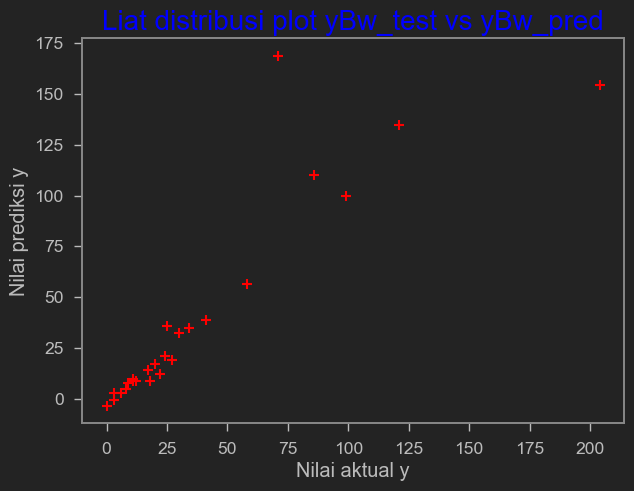

In [107]:
# Visualise the plotting
plt.figure(figsize = (7,5))
plt.scatter(yClr_test, yClr_pred, marker = '+', color = 'red')
plt.title('Liat distribusi plot yBw_test vs yBw_pred', fontsize = 20, color = 'blue')
plt.xlabel('Nilai aktual y')
plt.ylabel('Nilai prediksi y')
plt.savefig('Evaluasi.png')
plt.show()

In [109]:
# MSE analysis for train and test BW dataset
train_pred_bw = lr_bw.predict(xBw_train)

print('RMSE value for train dataset:')
print((np.mean((yBw_train - train_pred_bw)**2))**0.5,'\n')
print('RMSE value for test dataset:')
print((np.mean((yBw_test - yBw_pred)**2))**0.5)

RMSE value for train dataset:
72.97221547525668 

RMSE value for test dataset:
60.46356675363809


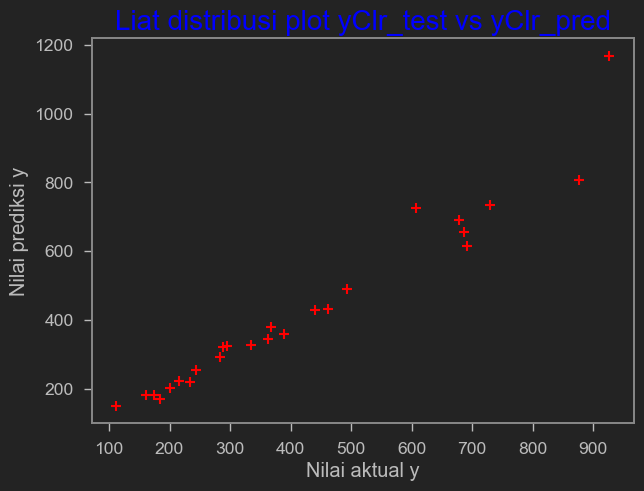

In [104]:
plt.figure(figsize = (7,5))
plt.scatter(yBw_test, yBw_pred, marker = '+', color = 'red')
plt.title('Liat distribusi plot yClr_test vs yClr_pred', fontsize = 20, color = 'blue')
plt.xlabel('Nilai aktual y')
plt.ylabel('Nilai prediksi y')
plt.savefig('Evaluasi.png')
plt.show()

In [108]:
# MSE analysis for train and test CLR dataset
train_pred_clr = lr.predict(xClr_train)

print('RMSE value for train dataset:')
print((np.mean((yClr_train - train_pred_clr)**2))**0.5,'\n')
print('RMSE value for test dataset:')
print((np.mean((yClr_test - yClr_pred)**2))**0.5)

RMSE value for train dataset:
25.775308535431147 

RMSE value for test dataset:
23.006892236201374


Text(0.5, 1.0, 'Residual Plots (BW)')

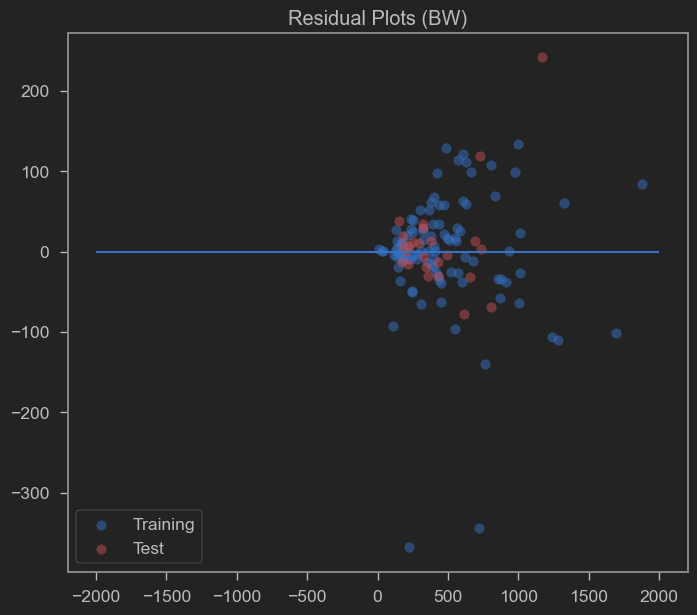

In [118]:
# Residual Plots
train = plt.scatter(train_pred_bw,(train_pred_bw-yBw_train),c="b",alpha=0.5)
test = plt.scatter(yBw_pred,(yBw_pred-yBw_test),c="r",alpha=0.5)
plt.hlines(y=0,xmin=-2000,xmax=2000)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots (BW)')

Text(0.5, 1.0, 'Residual Plots (CLR)')

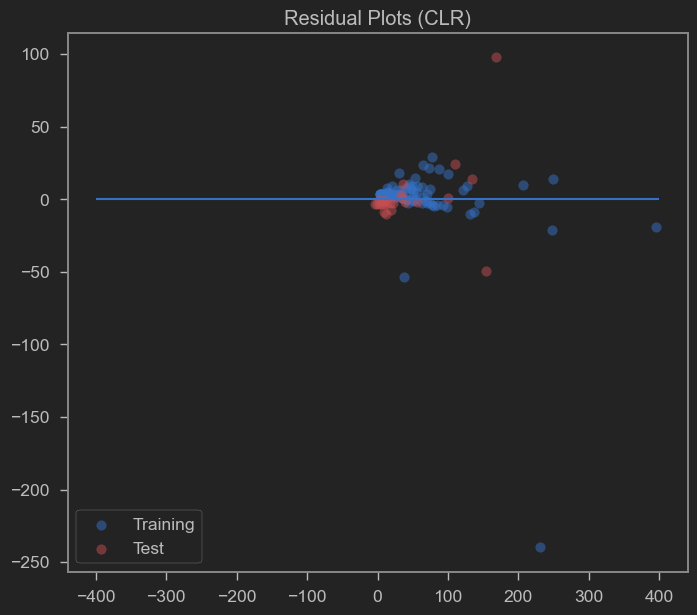

In [119]:
train_clr = plt.scatter(train_pred_clr,(train_pred_clr-yClr_train),c="b",alpha=0.5)
test_clr = plt.scatter(yClr_pred,(yClr_pred-yClr_test),c="r",alpha=0.5)
plt.hlines(y=0,xmin=-400,xmax=400)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots (CLR)')

C:\Users\Garimahdi.Supandi\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


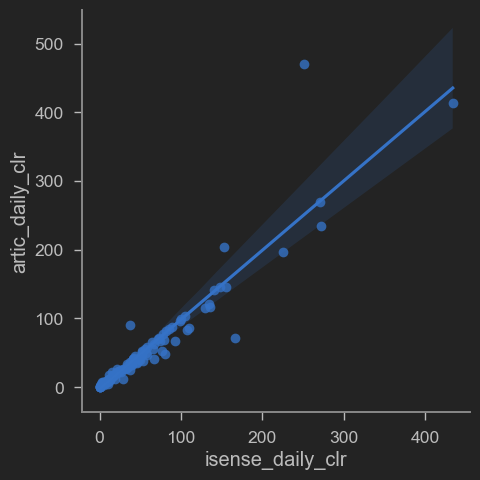

In [58]:
sns.lmplot(x = mdcc[1],y = mdcc[0],data = model_data_clr)

## colour count model:
## y = 1.0097x - 2.6914

C:\Users\Garimahdi.Supandi\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


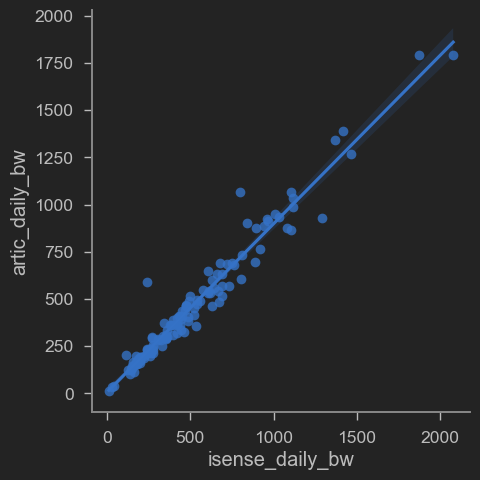

In [57]:
sns.lmplot(x = mdb[1],y = mdb[0],data = model_data_bw)

## Mono count model:
## y = 0.8916x + 6.9889

## Try to make linear regression fitting from statsmodels package

In [67]:
x_clr = sm.add_constant(xClr)
x_bw = sm.add_constant(xBw)

ols_clr = sm.OLS(endog=yClr, exog=x_clr).fit()
ols_bw = sm.OLS(endog=yBw, exog=x_bw).fit()

print(ols_clr.summary())

                            OLS Regression Results                            
Dep. Variable:        artic_daily_clr   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     898.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.16e-58
Time:                        14:46:51   Log-Likelihood:                -574.47
No. Observations:                 125   AIC:                             1153.
Df Residuals:                     123   BIC:                             1159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.6914      2.753  

In [68]:
print(ols_bw.summary())

                            OLS Regression Results                            
Dep. Variable:         artic_daily_bw   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2570.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.73e-84
Time:                        15:04:03   Log-Likelihood:                -709.38
No. Observations:                 125   AIC:                             1423.
Df Residuals:                     123   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9889     11.077     

# Try to make linear regression model using numpy.linalg

In [54]:
mBw = np.array([[i,1] for i in xBw])
mClr = np.array([[i,1] for i in xClr])

mBw = mBw.astype(float)
mClr = mClr.astype(float)

m,b = np.linalg.lstsq(mBw,yBw,rcond=0)[0]
print('yBw = ({0}) xBw + {1}'.format(m,b))

m1, b1 = np.linalg.lstsq(mClr,yClr,rcond=0)[0]
print('yClr = ({0}) xClr + {1}'.format(m1,b1))

print(np.sqrt((np.linalg.lstsq(mBw,yBw,rcond=0)[1])/len(mBw))[0])
print(np.sqrt((np.linalg.lstsq(mClr,yClr,rcond=0)[1])/len(mBw))[0])

yBw = (0.8916014410798434) xBw + 6.988898544646862
yClr = (1.0097044441015937) xClr + -2.6913554137519036
70.53562513485956
23.969567128032548


In [47]:
# ------------------------------------------------------------------------------ #
x = np.array(xClr).reshape(-1,1)
lr_test = lr.fit(x,yClr)
print(lr_test.score(x,yClr))

x1 = np.array(xBw).reshape(-1,1)
lr_test = lr.fit(x1,yBw)
print(lr_test.score(x1,yBw))

0.8796326206041741
0.9543244632866366
